# **🩺 Health Insurance Cost Prediction - Imelda Cyntia**

## 📌 Ringkasan
Proyek ini bertujuan untuk memprediksi biaya asuransi kesehatan (charges) berdasarkan beberapa faktor seperti usia, jenis kelamin, indeks massa tubuh (BMI), jumlah anak, status merokok, dan wilayah tempat tinggal. Dengan menggunakan teknik regresi.

## 📊 Sumber Dataset
Dataset digunakan dari Kaggle:  
🔗 https://www.kaggle.com/datasets/mirichoi0218/insurance


# **Import Libraries**

In [57]:
# Import library dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk memastikan visualisasi muncul di notebook
%matplotlib inline

# Import library machine learning
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

# **Data Loading**

In [58]:
# Upload file CSV
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [59]:
# Membaca file yang diunggah (misalnya 'insurance.csv')
df = pd.read_csv('insurance.csv')

# Menampilkan isi dataset
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Berdasarkan informasi dari dataset, berikut adalah penjelasan untuk masing-masing kolom:

* **age** = usia pemegang polis asuransi (dalam tahun).
* **sex** = jenis kelamin pemegang polis ('male' atau 'female').
* **bmi** = Body Mass Index, yaitu indeks massa tubuh yang dihitung berdasarkan tinggi dan berat badan.
* **children** = jumlah anak yang menjadi tanggungan pemegang polis.
* **smoker** = status merokok pemegang polis ('yes' jika merokok, 'no' jika tidak).
* **region** = wilayah tempat tinggal pemegang polis di Amerika Serikat (southwest, southeast, northwest, northeast).
* **charges** = total biaya medis yang dibebankan kepada pemegang polis (dalam satuan dolar AS).


### Menampilkan info dari dataset

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Output kode di atas memberikan informasi :

* Dataset memiliki 7 kolom dan 1338 baris data.
* Terdapat:

  * 2 kolom bertipe data `float64` (`bmi`, `charges`)
  * 2 kolom bertipe data `int64` (`age`, `children`)
  * 3 kolom bertipe data `object` (`sex`, `smoker`, `region`)
* Tidak terdapat nilai Null pada seluruh kolom (semua kolom memiliki 1338 data).
* Kolom **`charges`** merupakan target variabel, yaitu total biaya medis yang dibebankan dan sering digunakan dalam pemodelan prediktif.

### Menampilkan statistik dari dataset

In [61]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Output kode di atas memberikan informasi:

* Count adalah jumlah sampel pada data, yaitu sebanyak 1338 untuk setiap kolom numerik (`age`, `bmi`, `children`, dan `charges`).
* Mean adalah nilai rata-rata dari setiap kolom:

  * Usia rata-rata: 39.21 tahun
  * BMI rata-rata: 30.66
  * Anak tanggungan rata-rata: 1.09 anak
  * Biaya medis rata-rata: \$13,270.42
* Std adalah standar deviasi yang menunjukkan sebaran data:

  * Usia menyebar ±14.05 dari rata-rata
  * Biaya medis menyebar cukup luas, dengan deviasi ±\$12,110.01
* Min yaitu nilai minimum dari setiap kolom, contohnya:

  * Usia termuda: 18 tahun
  * Biaya medis terendah: \$1,121.87
* 25% adalah kuartil pertama, artinya 25% data berada di bawah nilai ini.
* 50% adalah kuartil kedua atau median, yaitu nilai tengah dari data.
* 75% adalah kuartil ketiga, menunjukkan bahwa 75% data berada di bawah nilai ini.
* Max adalah nilai maksimum, misalnya:

  * Biaya medis tertinggi: \$63,770.43



In [62]:
# Menampilkan jumlah missing value di setiap kolom
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#### Menggunakan visualisasi boxplot untuk melihat apakah terdapat outliers.

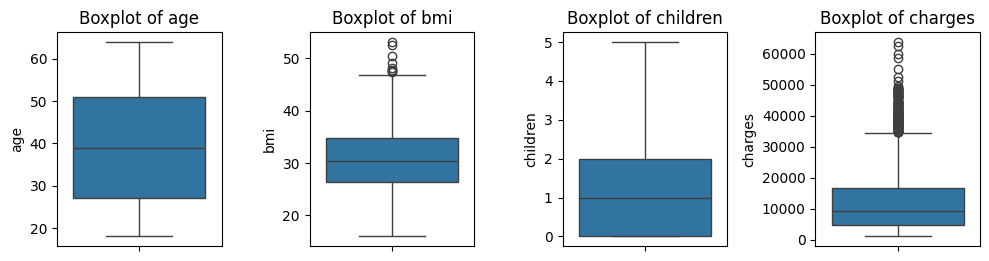

In [63]:
#Kolom numerik yang akan diperiksa outliers nya
numeric_columns = ['age', 'bmi', 'children','charges']

# Menampilkan boxplot untuk masing-masing kolom
plt.figure(figsize=(10, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Output dari kode di atas menunjukkan bahwa beberapa fitur numerik yang dianalisis mengandung nilai pencilan (outliers).

## Univariate Analysis

### Membagi dataset berdasarkan tipe data yaitu categorical dan numerical.

In [64]:
# Memisahkan kolom berdasarkan tipe datanya
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Menampilkan nama-nama kolom berdasarkan tipe data
print("Kolom kategorikal:", list(categorical_columns))
print("Kolom numerikal:", list(numerical_columns))

Kolom kategorikal: ['sex', 'smoker', 'region']
Kolom numerikal: ['age', 'bmi', 'children', 'charges']


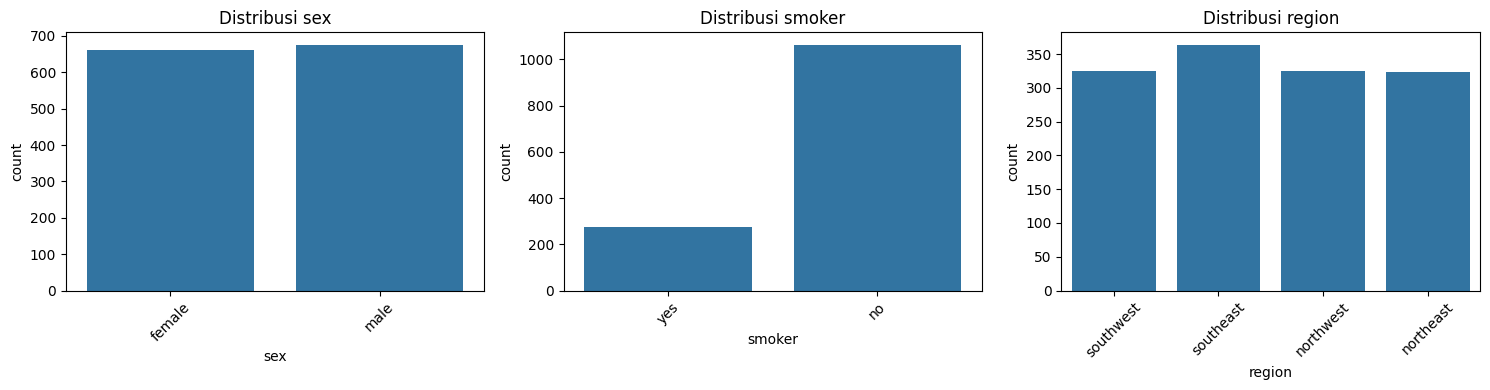

In [65]:
# Univariate analysis untuk kolom kategorikal
plt.figure(figsize=(15, 4))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

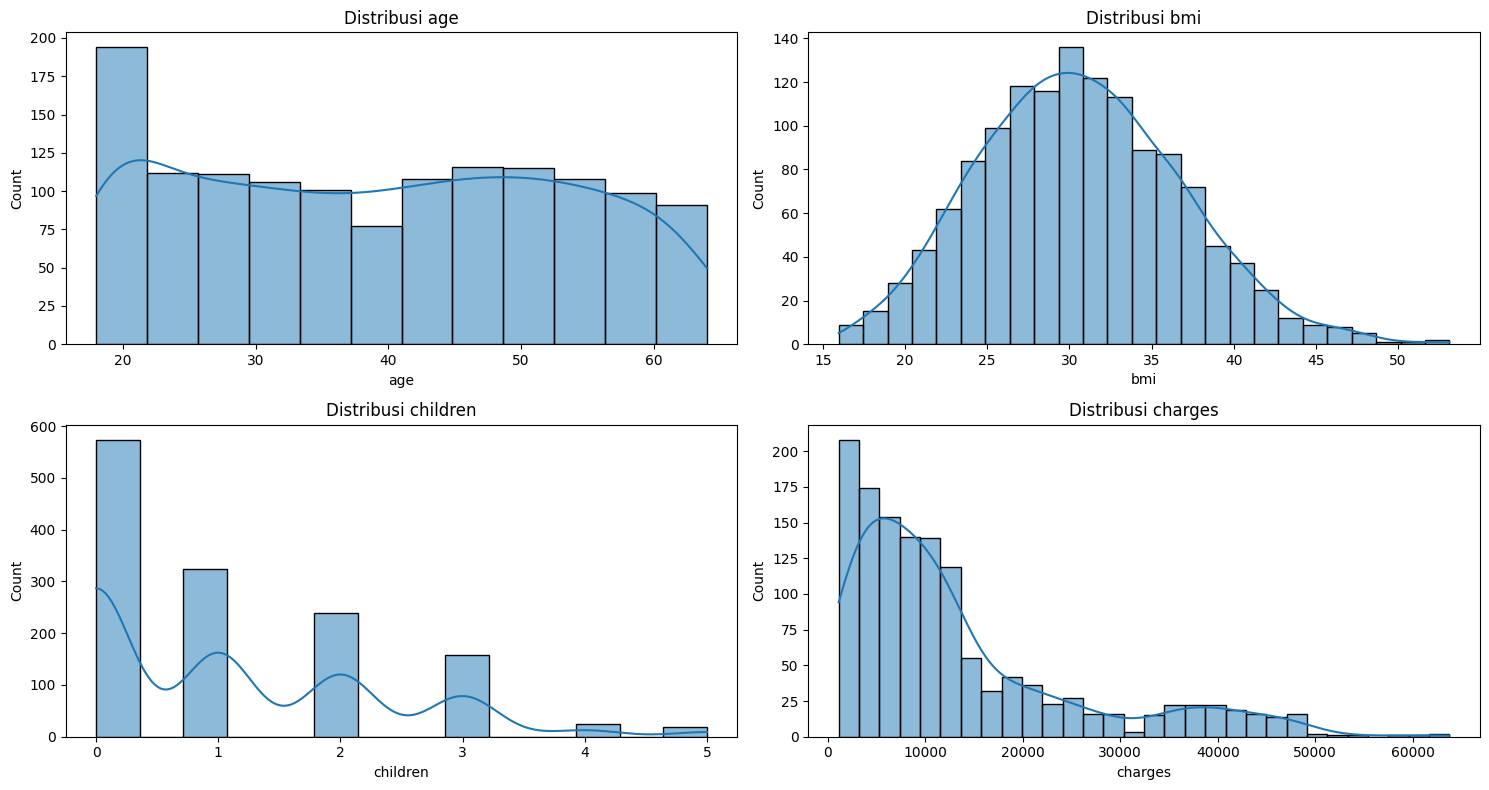

In [66]:
# Univariate analysis untuk kolom numerikal
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

Berdasarkan hasil Univariate Analysis, berikut beberapa insight yang bisa disimpulkan:

### 1. **Fitur Kategorikal:**

* `sex`: Distribusi antara laki-laki dan perempuan relatif seimbang, sehingga model tidak akan bias terhadap jenis kelamin tertentu.
* `smoker`: Terlihat bahwa mayoritas responden adalah *non-smoker*, namun proporsi *smoker* yang cukup besar tetap signifikan. Ini penting karena variabel ini sangat berpengaruh terhadap biaya asuransi.
* `region`: Distribusi data cukup merata antar wilayah, meskipun ada sedikit dominasi pada beberapa region, seperti `southeast`. Ini baik karena memberi representasi yang adil dari berbagai lokasi geografis.

### 2. **Fitur Numerikal:**

* `age`: Distribusi usia cukup merata dengan kecenderungan meningkat pada usia dewasa muda dan pertengahan.
* `bmi`: Terdistribusi normal dengan sedikit skew ke kanan. Setelah penghapusan *outlier*, distribusi terlihat lebih rapi. Masih ada indikasi beberapa individu dengan BMI tinggi.
* `children`: Mayoritas memiliki 0 hingga 2 anak. Nilai maksimum tidak terlalu ekstrem.
* `charges`: Distribusi sangat skew ke kanan (*right-skewed*), menunjukkan bahwa sebagian kecil individu memiliki biaya asuransi yang jauh lebih tinggi. Ini wajar karena biaya akan meningkat drastis jika individu adalah perokok atau memiliki kondisi medis tertentu.



## Bivariate Analysis

### Boxplot dan scatterplot dalam satu loop Untuk memvisualisasi hubungan antara fitur dan target (charges)

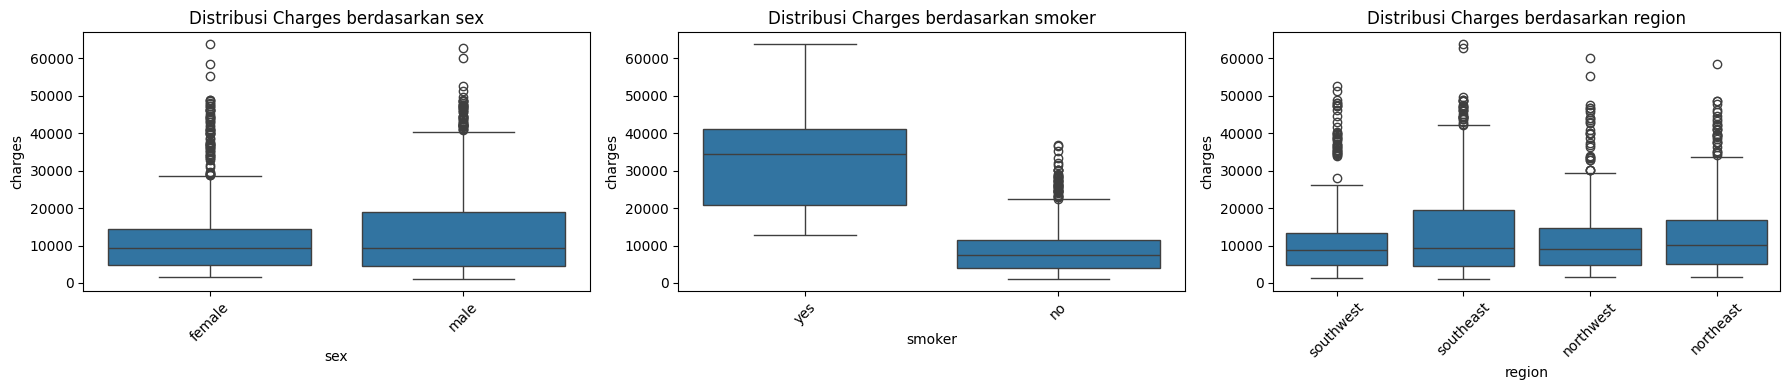

In [67]:
# Visualisasi hubungan variabel kategorikal dengan charges (dalam satu baris)
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(6 * len(categorical_columns), 4))

# Bungkus axes menjadi list jika hanya satu kolom
if len(categorical_columns) == 1:
    axes = [axes]

# Loop setiap kolom kategorikal dan plot boxplot ke subplot masing-masing
for i, col in enumerate(categorical_columns):
    sns.boxplot(x=col, y='charges', data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi Charges berdasarkan {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Variabel Kategorikal vs Charges

1. **Sex (Jenis Kelamin) vs Charges**

   * Rata-rata charges pria sedikit lebih tinggi dibanding wanita, tapi perbedaannya tidak terlalu signifikan.
   * Distribusinya cukup mirip antara laki-laki dan perempuan.

2. **Smoker (Perokok) vs Charges**

   * Perokok memiliki charges yang jauh lebih tinggi daripada non-perokok.
   * Ini adalah salah satu variabel paling signifikan terhadap charges. Korelasi sangat kuat.
   * Outlier charges yang tinggi hampir semuanya berasal dari kelompok smoker.

3. **Region vs Charges**

   * Distribusi charges di tiap region relatif mirip.
   * Tidak ada perbedaan signifikan antar region dalam hal pengeluaran charges.



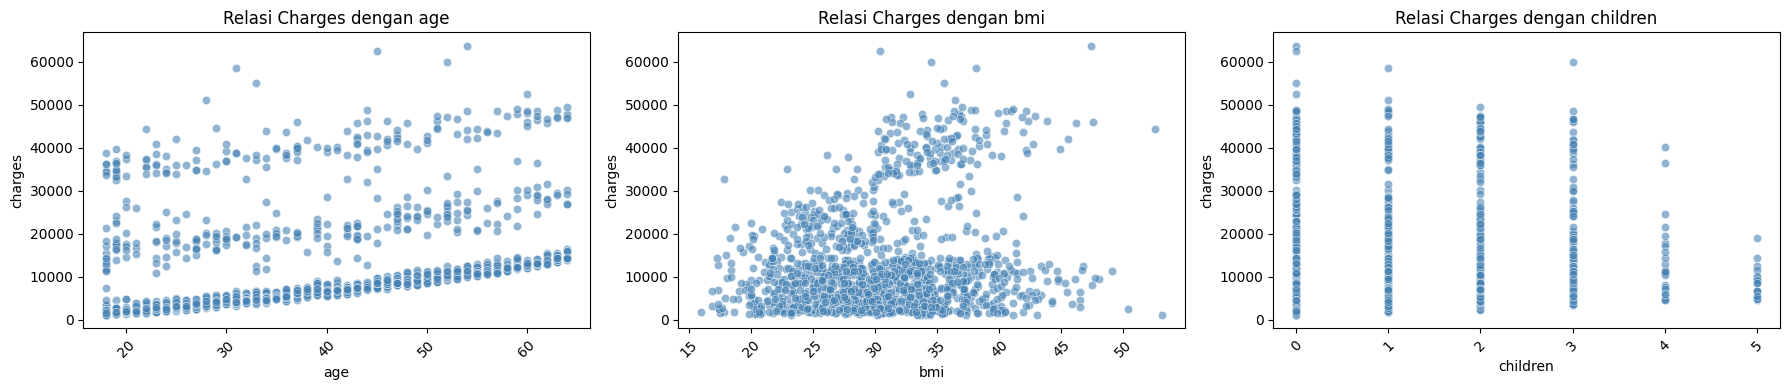

In [68]:
# Visualisasi hubungan variabel numerik dengan charges
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns) - 1, figsize=(6 * (len(numerical_columns) - 1), 4))

# Bungkus axes jadi list jika hanya satu kolom
if len(numerical_columns) - 1 == 1:
    axes = [axes]

# Loop setiap kolom numerik dan plot scatterplot di subplot masing-masing
for i, col in enumerate([col for col in numerical_columns if col != 'charges']):
    sns.scatterplot(x=col, y='charges', data=df, ax=axes[i], color='steelblue', alpha=0.6)
    axes[i].set_title(f'Relasi Charges dengan {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Variabel Numerik vs Charges

### 1. Relasi Charges dengan Age (Usia)

* Terdapat pola yang cukup jelas bahwa semakin tinggi usia, biaya charges cenderung meningkat.
* Hal ini menunjukkan bahwa usia memiliki korelasi positif dengan charges.
* Mungkin karena risiko kesehatan meningkat seiring bertambahnya usia, sehingga biaya asuransi juga lebih tinggi.

### 2. Relasi Charges dengan BMI

* Tidak terlihat pola hubungan linier yang kuat antara BMI dan charges.
* Namun, terdapat beberapa outlier dengan charges tinggi pada BMI tinggi.
* Ini bisa mengindikasikan bahwa pada kasus tertentu, BMI tinggi berasosiasi dengan biaya lebih tinggi—kemungkinan karena kondisi kesehatan seperti obesitas.

### 3. Relasi Charges dengan Children

* Hubungan antara jumlah anak dan charges terlihat lemah.
* Distribusi charges tidak berubah secara signifikan untuk jumlah anak dari 0 hingga 5.
* Artinya, jumlah anak tidak terlalu memengaruhi besaran charges yang harus dibayar, atau pengaruhnya sangat kecil.


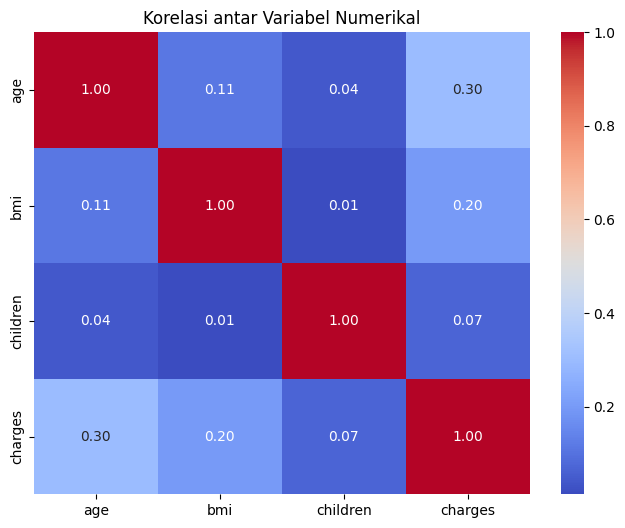

In [69]:
# Korelasi antar variabel numerikal
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Variabel Numerikal')
plt.show()

Berdasarkan output heatmap korelasi antar variabel numerikal pada gambar tersebut, berikut adalah beberapa insight yang dapat diambil:

1. **Age vs Charges (0.30)**
   Korelasi positif antara usia (age) dan biaya asuransi (charges) menunjukkan bahwa semakin tua seseorang, cenderung semakin tinggi biaya asuransinya. Meskipun tidak terlalu kuat, hubungan ini cukup relevan karena risiko kesehatan umumnya meningkat seiring bertambahnya usia.

2. **BMI vs Charges (0.20)**
  Terdapat korelasi positif yang lemah antara BMI dan charges. Ini menunjukkan bahwa peningkatan BMI mungkin sedikit berpengaruh terhadap biaya asuransi, namun tidak menjadi faktor dominan dalam dataset ini.

3. **Children vs Charges (0.07)**
   Hubungan antara jumlah anak dan biaya asuransi sangat lemah, yang mengindikasikan bahwa jumlah tanggungan anak kemungkinan tidak memiliki pengaruh signifikan terhadap besarnya tagihan asuransi.

4. **Korelasi antar prediktor**
  Korelasi antar variabel numerikal lainnya seperti age-bmi (0.11), age-children (0.04), dan bmi-children (0.01) semuanya rendah. Ini menunjukkan bahwa tidak terdapat multikolinearitas tinggi antar fitur, sehingga model regresi yang dibangun nantinya tidak akan terlalu terpengaruh oleh hubungan antar prediktor tersebut.

# **Data Preparation**

Pada bagian ini kita akan melakukan tiga tahap persiapan data, yaitu:

1. **Menangasi Outilners**

2. **Encoding Fitur Kategorikal**

   * Ubah kolom bertipe kategorikal menjadi numerik:

     * `sex` → Binary encoding (misalnya: female = 0, male = 1)
     * `smoker` → Binary encoding (no = 0, yes = 1)
     * `region` → One-hot encoding karena memiliki lebih dari dua kategori

3. **Pembagian Dataset (train-test split)**

   * Pisahkan data menjadi data latih dan data uji untuk mengevaluasi performa model
   * Contoh umum: 80% data latih dan 20% data uji

4. **Standarisasi Fitur Numerik**

   * Lakukan standardisasi pada kolom numerik seperti `age`, `bmi`, dan `children`
   * Tujuannya untuk menyamakan skala agar model dapat belajar lebih optimal, terutama untuk algoritma yang sensitif terhadap skala fitur


### 1.Menangani Outliers

In [70]:
#Fungsi untuk menghapus outlier
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#Daftar kolom yang akan diatasi outliersnya
numeric_columns = ['age', 'bmi', 'children','charges']

#Menghapus outliers dari masing-masing kolom
for column in numeric_columns:
    df = remove_outliers_iqr(df, column)

# Verifikasi hasil
df.shape

(1191, 7)

Berdasarkan hasil dari kode di atas, dapat disimpulkan bahwa dataset telah terbersihkan dan jumlah sampel yang tersedia sekarang adalah 1191.

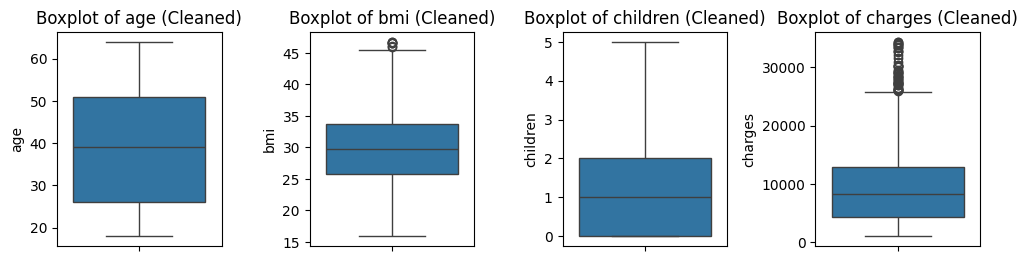

In [71]:
# Menampilkan boxplot ulang setelah outlier dihapus
plt.figure(figsize=(10, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column} (Cleaned)')
plt.tight_layout()
plt.show()

### 2. Encoding Fitur Kategorikal

In [72]:
# Binary encoding untuk 'sex' dan 'smoker'
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# One-hot encoding untuk 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=False)

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


### 3. Pembagian Dataset (train-test split)

In [73]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df.drop('charges', axis=1)  # Fitur
y = df['charges']              # Target

# Pembagian data: 80% latih, 20% uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [74]:
# Menampilkan jumlah sampel pada data latih dan data uji
print(f'Jumlah data pada data latih: {len(X_train)}')
print(f'Jumlah data pada data uji  : {len(X_test)}')

Jumlah data pada data latih: 952
Jumlah data pada data uji  : 239


### 4. Standarisasi Fitur Numerik

In [75]:
from sklearn.preprocessing import StandardScaler

# Daftar kolom numerik yang akan distandarisasi
numerical_columns = ['age', 'bmi', 'children']

# Inisialisasi objek scaler
scaler = StandardScaler()

# Standarisasi fitur numerik pada data latih dan data uji
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

X_train[numerical_columns].head()

,age,bmi,children
253,-0.836805,0.049988,1.544532
778,-0.271262,0.732090,1.544532
735,0.718439,0.808445,-0.089240
483,0.859825,1.611017,-0.089240
877,-0.412648,0.582774,3.178305


In [76]:
# Mengecek nilai mean dan standar deviasi dari kolom numerik hasil standarisasi
X_train[numerical_columns].describe().round(4)

,age,bmi,children
count,952.0000,952.0000,952.0000
mean,-0.0000,-0.0000,-0.0000
std,1.0005,1.0005,1.0005
min,-1.4730,-2.3832,-0.9061
25%,-0.9075,-0.7159,-0.9061
50%,0.0115,-0.0459,-0.0892
75%,0.8598,0.6473,0.7276
max,1.7788,2.8412,3.1783


# **Modeling**

##### Pada tahap modeling saya menggunakan tiga model yaitu K-Nearest Neighbor, Random Forest, dan Gradient Boosting.

In [77]:
# Menyiapkan dataframe untuk menyimpan hasil evaluasi model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'GradientBoosting'])

In [78]:
# --------------------------------------
# Model 1: KNN
# --------------------------------------

# Inisialisasi dan latih model KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Hitung MSE untuk data latih
models.loc['train_mse', 'KNN'] = mean_squared_error(y_train, knn.predict(X_train))

In [79]:
# --------------------------------------
# Model 2: Random Forest Regressor
# --------------------------------------

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_train, rf.predict(X_train))

In [80]:
# --------------------------------------
# Model 3: Gradient Boosting Regressor
# --------------------------------------

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

models.loc['train_mse', 'GradientBoosting'] = mean_squared_error(y_train, gb.predict(X_train))

# **Evaluation**

#### Menghitung dan Menampilkan Nilai MSE untuk Masing-masing Model

In [81]:
# Menghitung MSE untuk data uji (test)
models.loc['test_mse', 'KNN'] = mean_squared_error(y_test, knn.predict(X_test))
models.loc['test_mse', 'RandomForest'] = mean_squared_error(y_test, rf.predict(X_test))
models.loc['test_mse', 'GradientBoosting'] = mean_squared_error(y_test, gb.predict(X_test))

# Menampilkan tabel hasil evaluasi
print("Hasil Evaluasi Model (MSE):")

models

Hasil Evaluasi Model (MSE):


,KNN,RandomForest,GradientBoosting
train_mse,19099397.134224,4524854.707987,12817935.842117
test_mse,25944624.819777,19449671.349175,18014631.467065


#### Visualisasi dengan Bar Chart


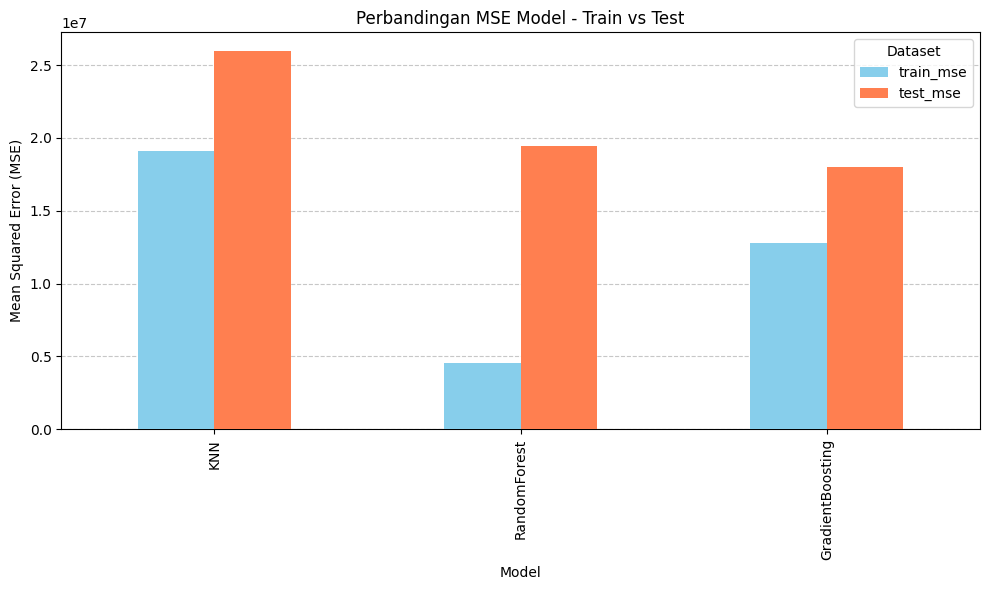

In [82]:
# Visualisasi MSE menggunakan vertical bar chart
# Sort berdasarkan MSE test, dari terbesar ke terkecil
mse_sorted = models.T.sort_values(by='test_mse', ascending=False)

# Plot bar chart vertikal
fig, ax = plt.subplots(figsize=(10, 6))
mse_sorted.plot(kind='bar', ax=ax, zorder=3, color=['skyblue', 'coral'])

# Customisasi tampilan
ax.set_title('Perbandingan MSE Model - Train vs Test')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_xlabel('Model')
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
ax.legend(title='Dataset', loc='upper right')

plt.tight_layout()
plt.show()

Dari hasil visualisasi di atas, Gradient Boosting menunjukkan performa terbaik dengan MSE terkecil pada data uji, menandakan kemampuan generalisasi yang baik. Sebaliknya, KNN memiliki MSE terbesar di train dan test, mengindikasikan underfitting atau parameter yang kurang optimal.

#### Visualisasi Model dengan MSE Paling Rendah

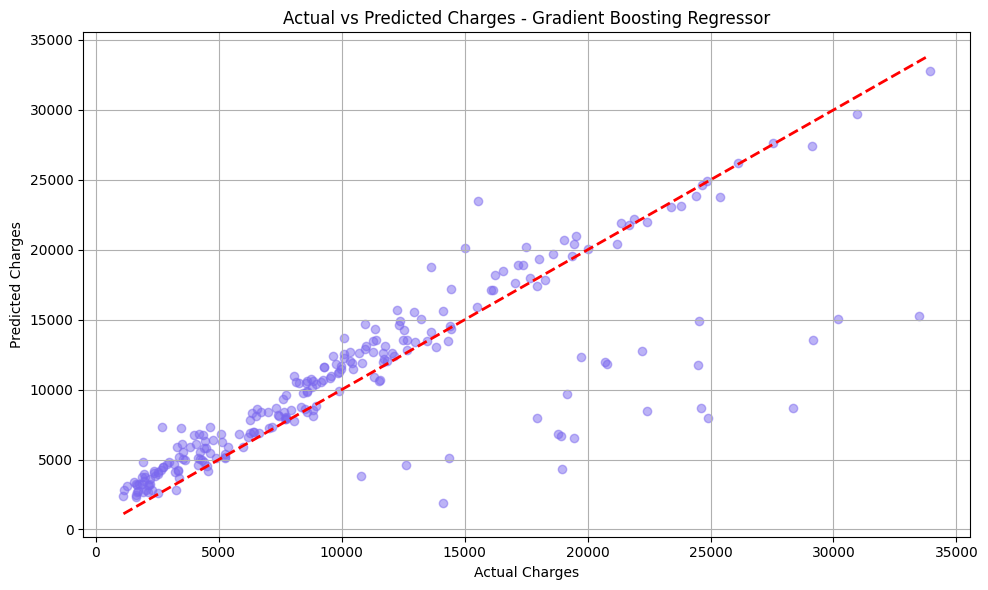

In [83]:
# --------------------------------------
# Visualisasi Gradient Boosting (MSE terkecil)
# --------------------------------------

# Prediksi pada data uji
y_pred_gb = gb.predict(X_test)

# Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='mediumslateblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges - Gradient Boosting Regressor')
plt.grid(True)
plt.tight_layout()
plt.show()

Dari visualisasi model Gradient Boosting menunjukkan performa yang cukup baik. Titik-titik prediksi (ungu kebiruan) tersebar dekat dengan garis merah putus-putus (garis ideal prediksi sempurna), terutama pada rentang nilai charges di bawah 20.000. Ini menandakan bahwa model mampu memprediksi biaya dengan cukup akurat dalam mayoritas kasus.

Namun, terdapat penyebaran error yang lebih besar di nilai charges yang tinggi (di atas 20.000), terlihat dari beberapa titik yang jauh dari garis referensi. Ini bisa menjadi indikasi bahwa model sedikit kesulitan memprediksi dengan akurasi tinggi pada data dengan nilai ekstrem.

Secara keseluruhan, model ini memberikan keseimbangan yang baik antara bias dan variansi, dan valid dipilih karena memiliki nilai MSE terendah.


#### Feature Importance dari Gradient Boosting

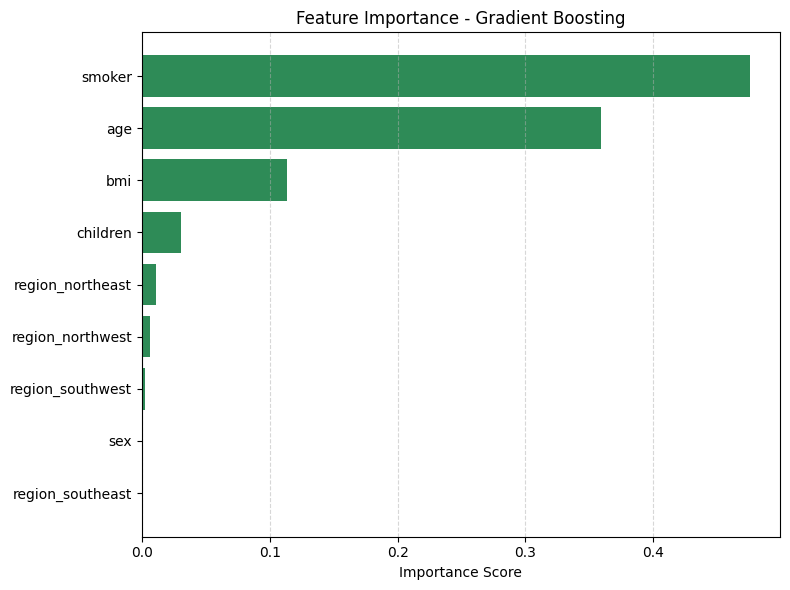

In [84]:
importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]

feature_names = X_train.columns

plt.figure(figsize=(8, 6))
plt.title("Feature Importance - Gradient Boosting")
plt.barh(range(len(importances_gb)), importances_gb[indices_gb], align='center', color='seagreen')
plt.yticks(range(len(importances_gb)), [feature_names[i] for i in indices_gb])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Berdasarkan hasil analisis feature importance, berikut adalah fitur-fitur yang paling berpengaruh terhadap besarnya biaya asuransi:

1. **Smoker** (Perokok)
   Fitur ini adalah yang paling berpengaruh. Orang yang merokok biasanya membayar biaya asuransi lebih tinggi karena mereka memiliki risiko kesehatan yang lebih besar.

2. **Age** (Usia)
   Usia juga sangat mempengaruhi biaya asuransi. Semakin tua usia seseorang, semakin tinggi biaya asuransinya, karena risiko kesehatan meningkat seiring bertambahnya usia.

3. **BMI** (Indeks Massa Tubuh)
   BMI yang lebih tinggi menunjukkan adanya risiko kesehatan yang lebih besar, seperti masalah jantung atau diabetes, yang membuat biaya asuransi menjadi lebih mahal.

Dari hasil ini, dapat disimpulkan bahwa perokok, orang yang lebih tua, dan mereka yang memiliki BMI tinggi, cenderung membayar biaya asuransi yang lebih mahal karena faktor risiko kesehatan yang lebih besar.
